# Data Generation Annotated

`data_generation_annotated.ipynb` : notebook for generating data for networks in the `wrapped` directory.

> Each type of data has a description of the data and notes the networks it will be used with

In [89]:
# imports
import numpy as np, pandas as pd, matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
darkness = True

## Overview
> In general the data created here will consist of complex data of the form 
\begin{equation}
y = e^{2\pi i\cdot(\tau\nu + \phi)}
\end{equation}
>
> where $\tau$ is some cable delay in nanoseconds, $\nu$ is some frequencyh in gigahertz, and $\phi$ is some phase in radians.

> This complex data is then converted to angles with `np.angle()`. The slope of the line $\tau$ is saved and then noise is added to the angle data. This noisey data with its corresponding $\tau$ is placed in a pandas dataframe and saved in a csv file with bz2 compression.

-  Most of the data will have a range of $\tau$ from -100ns to +100ns, and a range of $\phi$ from 0rad to 2$\pi$rad, generated with `np.random.uniform()`.

-  The types of noise added will vary.

In [4]:
# frequency channels for all data
min_freq = 0.1   # GHz
max_freq = 0.2   # GHz
num_freqs = 1024
freqs = np.linspace(min_freq, max_freq, num_freqs) # GHz

# tau bounds
min_tau = -100 # ns
max_tau =  100 # ns

In [5]:
# I realized on June 2nd that I did not actually need this function.
# I should just be saving the tau directly. 
# I will note in the notebook when I stop using it.

def get_slope(y, x = freqs):
    """
    Computes the mean slope of the data.
    Assumes the data is a *perfect* line
    
    Parameters
    ---------
    y (array) : complex data to be unwrapped
    x (array) : frequencies [GHz]
    
    Returns
    -------
    (float)  : slope of the line [nano-seconds]
    
    """
    return np.mean((np.diff(np.unwrap(y))  / (2 * np.pi)) / np.diff(x))

In [91]:
def plot_rand_data(data_path,
                   unwrapped = False,
                   wrapped = True,
                   dark = True,
                   small_range = True,
                   num = 5, cols = 5,
                   height = 1.5,
                   line = False):
    
    plots = num - (num % cols)
    rows = int(plots / cols)
    
    data = pd.read_csv(data_path)
    
    tau = data['tau'].values
    data = data.drop('tau', axis = 1).values
    
    random_entries = np.random.choice(range(data.shape[0]), size = plots)

    fig, axes = plt.subplots(rows,cols, figsize = (9, height), dpi = 144)
    if dark == True: plt.style.use('dark_background')
    
    for i, ax in enumerate(axes.reshape(-1)):
        if line == True:
            style = { 'linewidth' : 0.5}
        else:
            style = { 'linestyle' : 'None', 'marker' : '.', 'markersize' : 0.5, 'alpha' : 0.75}
        ax.set_title('{:02.1f}'.format(tau[random_entries[i]]), y = 0.65, fontsize = 7)
        if wrapped     == True:
            ax.plot(freqs, data[random_entries[i]], **style)
            
        if unwrapped   == True:
            ax.plot(freqs, np.unwrap(data[random_entries[i]]), **style)
        if small_range == True: ax.set_ylim(-2*np.pi,2*np.pi)
        
        ax.set_xticks([])
        ax.set_yticks([])
        
    plt.subplots_adjust(hspace = 0, wspace = 0)
    plt.show()
    del tau, data, random_entries, plots, rows

### Zero noise

 - 2500 entries per DataFrame
 - standard $\tau$ and $\phi$ range
 
> Filenames: `wrapped_2500_zero_noise_*.bz2`
 
> Networks:
> - ?

In [7]:
# # how many entries in the dataframe?
# num_entries = 2500

# # each entry has a slope computed before noise & spikes are applied
# tau_col = np.empty(num_entries)

# # generate data
# data = np.empty((num_entries, num_freqs))
# for i in range(num_entries):
    
#     # fix tau
#     tau = np.random.uniform(low = min_tau,
#                             high = max_tau) 
    
#     # fix phi
#     phi = np.random.uniform(high = 2 * np.pi)
    
#     # generate angle data from complex data
#     data[i]    = np.angle(np.exp(2*np.pi*1j * (tau*freqs + phi)))
    
#     # compute slope
#     tau_col[i] = get_slope(data[i])

# df = pd.DataFrame(data)
# df.insert(0, 'tau', tau_col)
# # df.to_csv('../../data/wrapped_2500_zero_noise_A.bz2', index = False, compression = 'bz2')
# # df.to_csv('../../data/wrapped_2500_zero_noise_B.bz2', index = False, compression = 'bz2')
# # df.to_csv('../../data/wrapped_2500_zero_noise_C.bz2', index = False, compression = 'bz2')
# # df.to_csv('../../data/wrapped_2500_zero_noise_D.bz2', index = False, compression = 'bz2')
# # df.to_csv('../../data/wrapped_2500_zero_noise_E.bz2', index = False, compression = 'bz2')

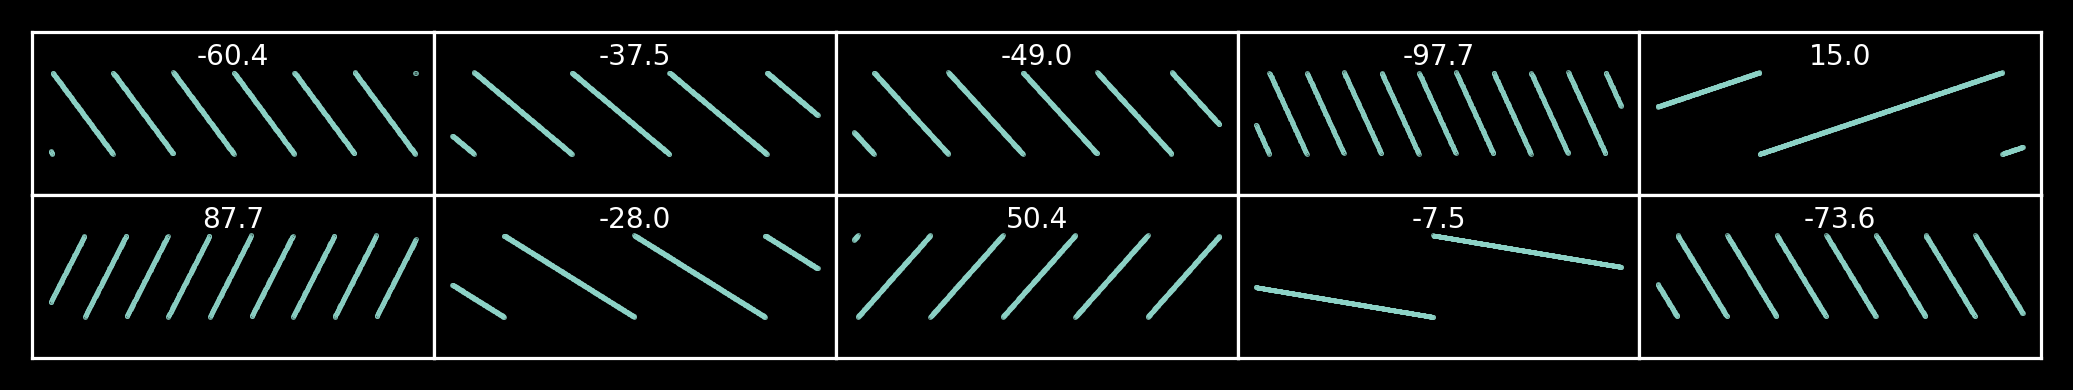

In [65]:
plot_rand_data('../../data/wrapped_2500_zero_noise_A.bz2', num = 10, dark = darkness)

### One Percent Spikes
 - 2500 entries per DataFrame
 - standard $\tau$ and $\phi$ range

> Spikes:
 - **$\approx$ 1%** of the data has spikes
  - 2500 entries $\implies \approx$ 25 may have spikes
  - spikes are added to up to **1%** of each entry
  - 1024 frequency channels $\implies$ up to 10 channels have a spike
 - Each spike is a value randomly chosen from `np.random.normal()` with $\sigma = \pi$/2
  - this value is added to the channels chosen as described above
  
> Filenames: `wrapped_2500_gaussian_spikes_one_percent_*.bz2`

> Networks:
 - ?

In [7]:
# # how many entries in the dataframe?
# num_entries = 2500

# # each entry has a slope computed before noise & spikes are applied
# tau_col = np.empty(num_entries)

# # generate data
# data = np.empty((num_entries, num_freqs))
# for i in range(num_entries):
    
#     # fix tau
#     tau = np.random.uniform(low = min_tau,
#                             high = max_tau) 
    
#     # fix phi
#     phi = np.random.uniform(high = 2 * np.pi)
    
#     # generate angle data from complex data
#     data[i]    = np.angle(np.exp(2*np.pi*1j * (tau*freqs + phi)))
    
#     # compute slope
#     tau_col[i] = get_slope(data[i])
    
#     if np.random.uniform() < 0.01:
        
#         number_of_spikes = np.random.randint(0, high = int(len(freqs) * 0.01))
#         spike_indices = np.random.randint(0, high = len(freqs), size = number_of_spikes)
#         for j in spike_indices:
#             data[i][j] += np.random.normal(scale = np.pi/2)

# df = pd.DataFrame(data)
# df.insert(0, 'tau', tau_col)
# # df.to_csv('../../data/wrapped_2500_gaussian_spikes_one_percent_A.bz2', index = False, compression = 'bz2')
# # df.to_csv('../../data/wrapped_2500_gaussian_spikes_one_percent_B.bz2', index = False, compression = 'bz2')
# # df.to_csv('../../data/wrapped_2500_gaussian_spikes_one_percent_C.bz2', index = False, compression = 'bz2')
# # df.to_csv('../../data/wrapped_2500_gaussian_spikes_one_percent_D.bz2', index = False, compression = 'bz2')

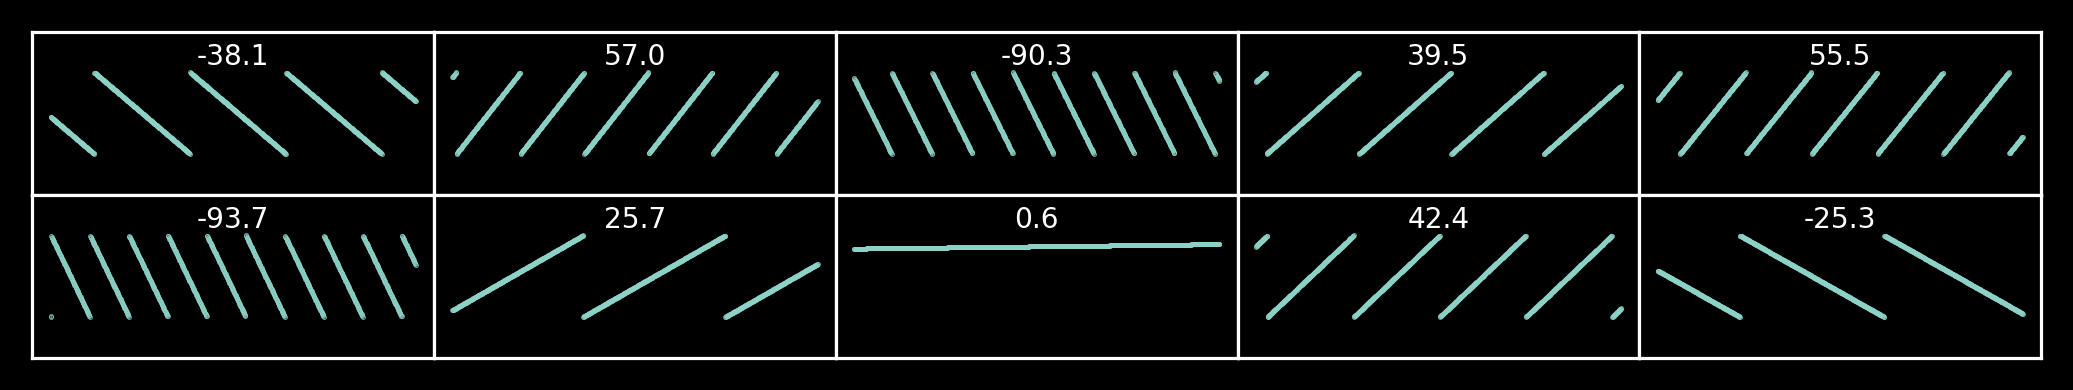

In [82]:
plot_rand_data('../../data/wrapped_2500_gaussian_spikes_one_percent_D.bz2', num = 10, dark = darkness, line = False)

### Five Percent Spikes
 - 10000 entries per DataFrame
 - standard $\tau$ and $\phi$ range

> Spikes:
 - **$\approx$ 5%** of the data has spikes
  - 10000 entries $\implies \approx$ 500 may have spikes
  - spikes are added to up to **1%** of each entry
  - 1024 frequency channels $\implies$ up to 10 channels have a spike
 - Each spike is a value randomly chosen from `np.random.normal()` with $\sigma = \pi$/2
  - this value is added to the channels chosen as described above
  
> Filenames: `wrapped_10000_gaussian_spikes_five_percent_*.bz2`

> Networks:
 - ?

In [7]:
# # how many entries in the dataframe?
# num_entries = 10000

# # each entry has a slope computed before noise & spikes are applied
# tau_col = np.empty(num_entries)

# # generate data
# data = np.empty((num_entries, num_freqs))
# for i in range(num_entries):
    
#     # fix tau
#     tau = np.random.uniform(low = min_tau,
#                             high = max_tau) 
    
#     # fix phi
#     phi = np.random.uniform(high = 2 * np.pi)
    
#     # generate angle data from complex data
#     data[i]    = np.angle(np.exp(2*np.pi*1j * (tau*freqs + phi)))
    
#     # compute slope
#     tau_col[i] = get_slope(data[i])
    
#     if np.random.uniform() < 0.05:
        
#         number_of_spikes = np.random.randint(0, high = int(len(freqs) * 0.01))
#         spike_indices = np.random.randint(0, high = len(freqs), size = number_of_spikes)
#         for j in spike_indices:
#             data[i][j] += np.random.normal(scale = np.pi/2)

# df = pd.DataFrame(data)
# df.insert(0, 'tau', tau_col)
# # df.to_csv('../../data/wrapped_10000_gaussian_spikes_five_percent_A.bz2', index = False, compression = 'bz2')
# # df.to_csv('../../data/wrapped_10000_gaussian_spikes_five_percent_B.bz2', index = False, compression = 'bz2')
# # df.to_csv('../../data/wrapped_10000_gaussian_spikes_five_percent_C.bz2', index = False, compression = 'bz2')
# # df.to_csv('../../data/wrapped_10000_gaussian_spikes_five_percent_D.bz2', index = False, compression = 'bz2')

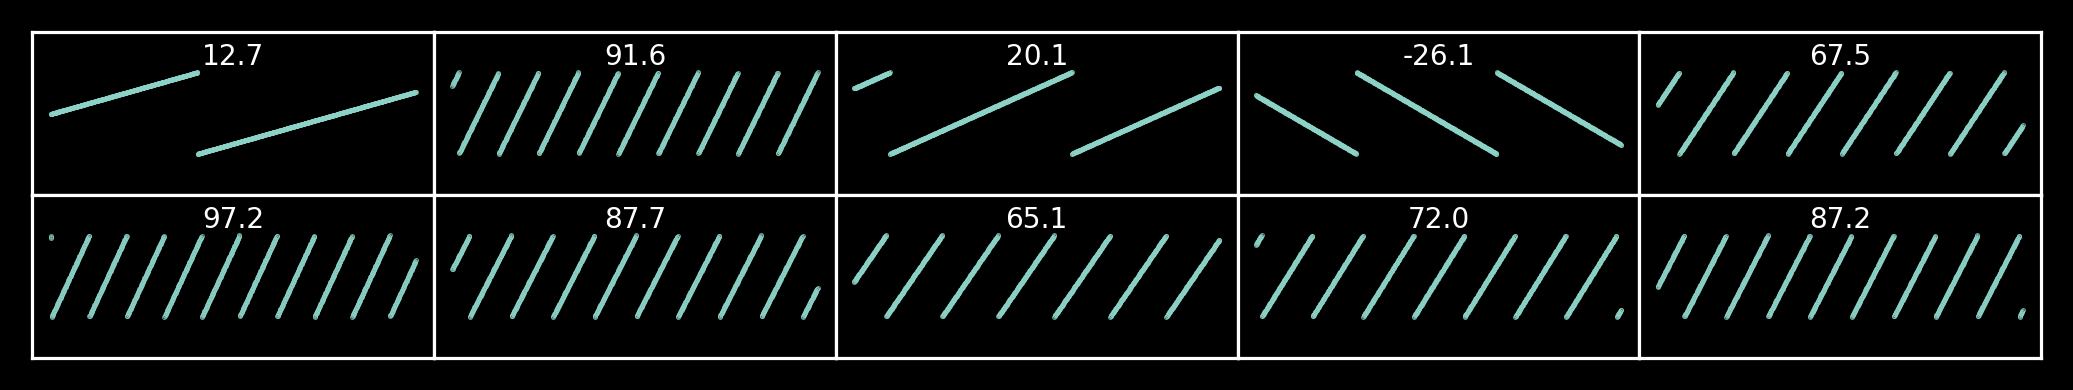

In [81]:
plot_rand_data('../../data/wrapped_10000_gaussian_spikes_five_percent_D.bz2', num = 10, dark = darkness, line = False)

### Twenty Five Percent Spikes
 - 20000 entries per DataFrame
 - standard $\tau$ and $\phi$ range

> Spikes:
 - **$\approx$ 25%** of the data has spikes
  - 20000 entries $\implies \approx$ 5000 may have spikes
  - spikes are added to up to **2%** of each entry
  - 1024 frequency channels $\implies$ up to 20 channels have a spike
 - Each spike is a value randomly chosen from `np.random.normal()` with $\sigma = \pi$/2
  - this value is added to the channels chosen as described above
  
> Filenames: `wrapped_20000_gaussian_spikes_twentyfive_percent_*.bz2`

> Networks:
 - ?

In [11]:
# # how many entries in the dataframe?
# num_entries = 20000

# # each entry has a slope computed before noise & spikes are applied
# tau_col = np.empty(num_entries)

# # generate data
# data = np.empty((num_entries, num_freqs))
# for i in range(num_entries):
    
#     # fix tau
#     tau = np.random.uniform(low = min_tau,
#                             high = max_tau) 
    
#     # fix phi
#     phi = np.random.uniform(high = 2 * np.pi)
    
#     # generate angle data from complex data
#     data[i]    = np.angle(np.exp(2*np.pi*1j * (tau*freqs + phi)))
    
#     # compute slope
#     tau_col[i] = get_slope(data[i])
    
#     if np.random.uniform() < 0.25:
        
#         number_of_spikes = np.random.randint(0, high = int(len(freqs) * 0.02))
#         spike_indices = np.random.randint(0, high = len(freqs), size = number_of_spikes)
#         for j in spike_indices:
#             data[i][j] += np.random.normal(scale = np.pi/2)

# df = pd.DataFrame(data)
# df.insert(0, 'tau', tau_col)
# # df.to_csv('../../data/wrapped_20000_gaussian_spikes_twentyfive_percent_A.bz2', index = False, compression = 'bz2')
# # df.to_csv('../../data/wrapped_20000_gaussian_spikes_twentyfive_percent_B.bz2', index = False, compression = 'bz2')
# # df.to_csv('../../data/wrapped_20000_gaussian_spikes_twentyfive_percent_C.bz2', index = False, compression = 'bz2')
# df.to_csv('../../data/wrapped_20000_gaussian_spikes_twentyfive_percent_D.bz2', index = False, compression = 'bz2')

In [ ]:
plot_rand_data('../../data/wrapped_20000_gaussian_spikes_twentyfive_percent_D.bz2', num = 10, dark = darkness, line = False)
plot_rand_data('../../data/wrapped_20000_gaussian_spikes_twentyfive_percent_D.bz2', num = 10, dark = darkness, line = True)

### One Hundred Percent Spikes
 - 5000 entries per DataFrame
 - standard $\tau$ and $\phi$ range

> Spikes:
 - **100%** of the data has spikes
  - 5000 entries $\implies$ 5000 may have spikes
  - spikes are added to up to **20 percent** of each entry
  - 1024 frequency channels $\implies$ up to 204 channels have a spike
 - Each spike is a value randomly chosen from `np.random.normal()` with $\sigma = \pi$/2
  - this value is added to the channels chosen as described above
  
> Filenames: `wrapped_5000_gaussian_spikes_onehundred_percent_*.bz2`

> Networks:
 - ?

In [12]:
# # how many entries in the dataframe?
# num_entries = 5000

# # each entry has a slope computed before noise & spikes are applied
# tau_col = np.empty(num_entries)

# # generate data
# data = np.empty((num_entries, num_freqs))
# for i in range(num_entries):
    
#     # fix tau
#     tau = np.random.uniform(low = min_tau,
#                             high = max_tau) 
    
#     # fix phi
#     phi = np.random.uniform(high = 2 * np.pi)
    
#     # generate angle data from complex data
#     data[i]    = np.angle(np.exp(2*np.pi*1j * (tau*freqs + phi)))
    
#     # compute slope
#     tau_col[i] = get_slope(data[i])
          
#     number_of_spikes = np.random.randint(0, high = int(len(freqs) * 0.2))
#     spike_indices = np.random.randint(0, high = len(freqs), size = number_of_spikes)
#     for j in spike_indices:
#         data[i][j] += np.random.normal(scale = np.pi/2)

# df = pd.DataFrame(data)
# df.insert(0, 'tau', tau_col)
# # df.to_csv('../../data/wrapped_5000_gaussian_spikes_onehundred_percent_A.bz2', index = False, compression = 'bz2')
# # df.to_csv('../../data/wrapped_5000_gaussian_spikes_onehundred_percent_B.bz2', index = False, compression = 'bz2')
# # df.to_csv('../../data/wrapped_5000_gaussian_spikes_onehundred_percent_C.bz2', index = False, compression = 'bz2')
# # df.to_csv('../../data/wrapped_5000_gaussian_spikes_onehundred_percent_D.bz2', index = False, compression = 'bz2')

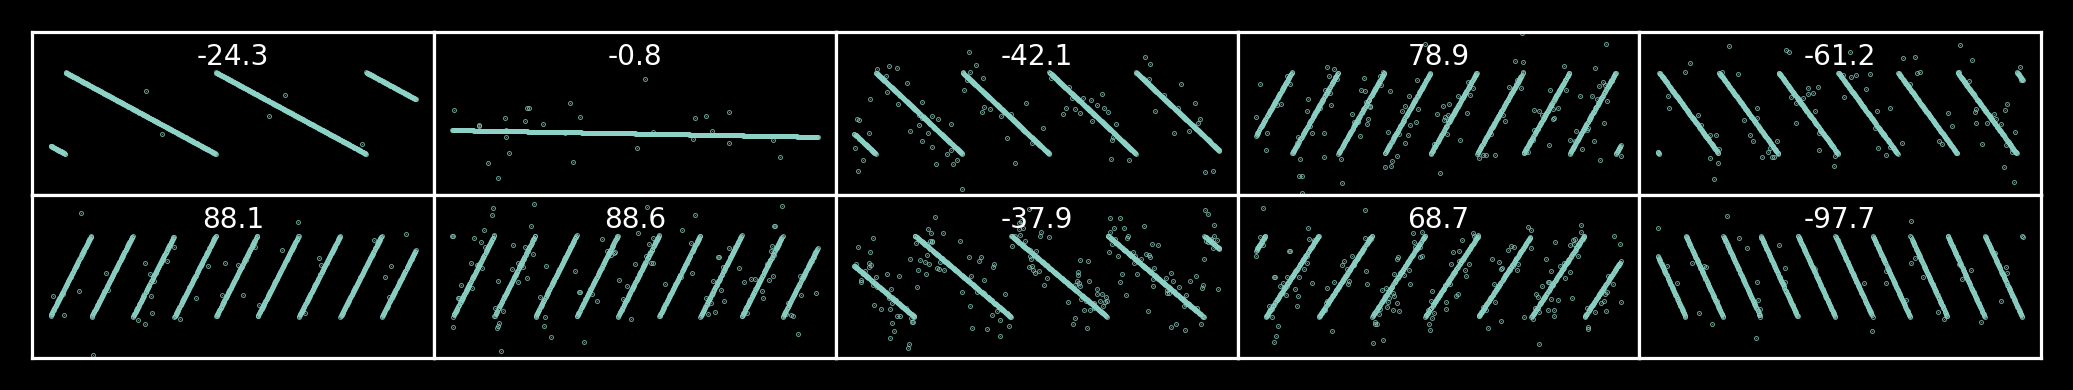

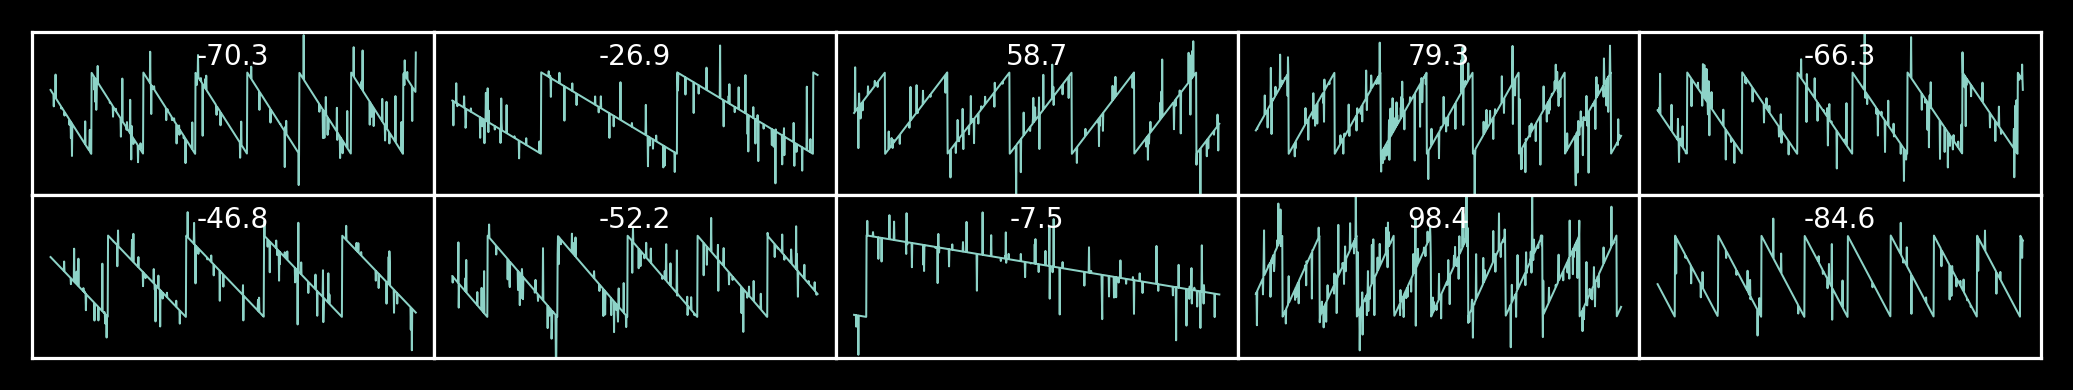

In [79]:
plot_rand_data('../../data/wrapped_5000_gaussian_spikes_onehundred_percent_D.bz2', num = 10, dark = darkness, line = False)
plot_rand_data('../../data/wrapped_5000_gaussian_spikes_onehundred_percent_D.bz2', num = 10, dark = darkness, line = True)

### Zero noise, bottom quintile

 - 2500 entries per DataFrame
 - standard $\phi$ range
 - **$\tau$ ranges from -100ns to -80ns**
 
> Filenames: `wrapped_2500_zero_noise_bottom_quintile_*.bz2`
 
> Networks:
> - ?

In [16]:
# # how many entries in the dataframe?
# num_entries = 2500

# # each entry has a slope computed before noise & spikes are applied
# tau_col = np.empty(num_entries)

# # generate data
# data = np.empty((num_entries, num_freqs))
# for i in range(num_entries):
    
#     # fix tau
#     tau = np.random.uniform(low = -100,
#                             high = -80) 
    
#     # fix phi
#     phi = np.random.uniform(high = 2 * np.pi)
    
#     # generate angle data from complex data
#     data[i]    = np.angle(np.exp(2*np.pi*1j * (tau*freqs + phi)))
    
#     # compute slope
#     tau_col[i] = get_slope(data[i])

# df = pd.DataFrame(data)
# df.insert(0, 'tau', tau_col)
# # df.to_csv('../../data/wrapped_2500_zero_noise_bottom_quintile_A.bz2', index = False, compression = 'bz2')
# # df.to_csv('../../data/wrapped_2500_zero_noise_bottom_quintile_B.bz2', index = False, compression = 'bz2')
# # df.to_csv('../../data/wrapped_2500_zero_noise_bottom_quintile_C.bz2', index = False, compression = 'bz2')
# # df.to_csv('../../data/wrapped_2500_zero_noise_bottom_quintile_D.bz2', index = False, compression = 'bz2')

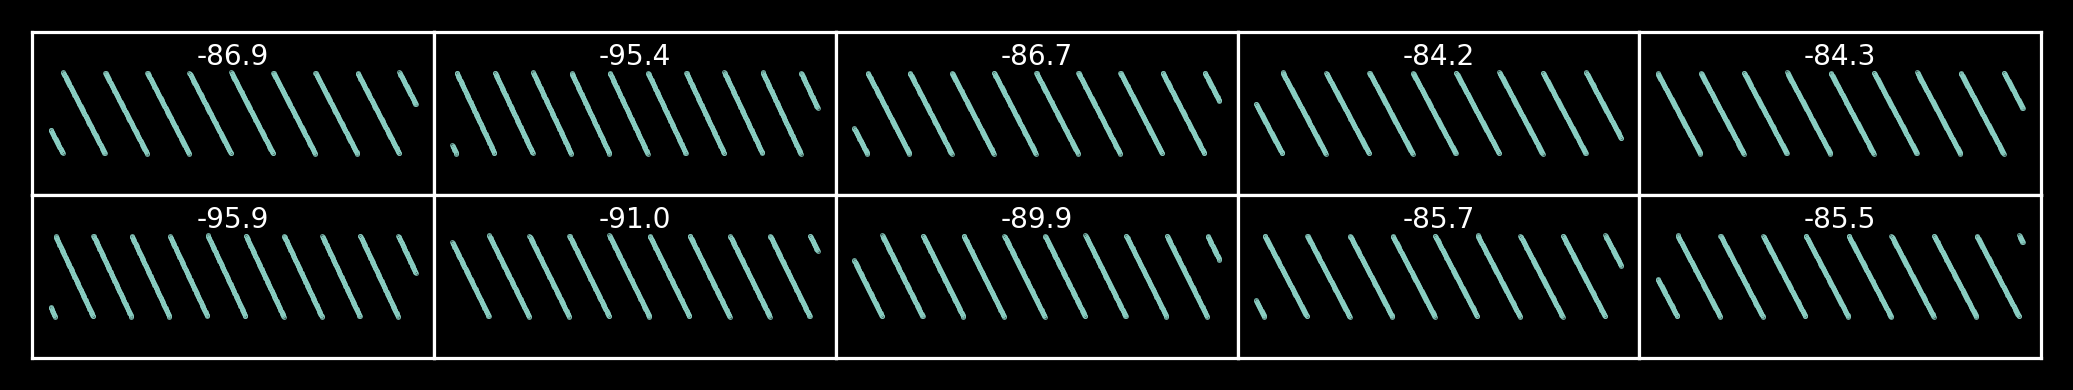

In [83]:
plot_rand_data('../../data/wrapped_2500_zero_noise_bottom_quintile_D.bz2', num = 10, dark = darkness, line = False)

### Zero noise, top quintile

 - 2500 entries per DataFrame
 - standard $\phi$ range
 - **$\tau$ ranges from 80ns to 100ns**
 
> Filenames: `wrapped_2500_zero_noise_top_quintile_*.bz2`
 
> Networks:
> - ?

In [20]:
# # how many entries in the dataframe?
# num_entries = 2500

# # each entry has a slope computed before noise & spikes are applied
# tau_col = np.empty(num_entries)

# # generate data
# data = np.empty((num_entries, num_freqs))
# for i in range(num_entries):
    
#     # fix tau
#     tau = np.random.uniform(low = 80,
#                             high = 100) 
    
#     # fix phi
#     phi = np.random.uniform(high = 2 * np.pi)
    
#     # generbate angle data from complex data
#     data[i]    = np.angle(np.exp(2*np.pi*1j * (tau*freqs + phi)))
    
#     # compute slope
#     tau_col[i] = get_slope(data[i])

# df = pd.DataFrame(data)
# df.insert(0, 'tau', tau_col)
# # df.to_csv('../../data/wrapped_2500_zero_noise_top_quintile_A.bz2', index = False, compression = 'bz2')
# # df.to_csv('../../data/wrapped_2500_zero_noise_top_quintile_B.bz2', index = False, compression = 'bz2')
# # df.to_csv('../../data/wrapped_2500_zero_noise_top_quintile_C.bz2', index = False, compression = 'bz2')
# # df.to_csv('../../data/wrapped_2500_zero_noise_top_quintile_D.bz2', index = False, compression = 'bz2')

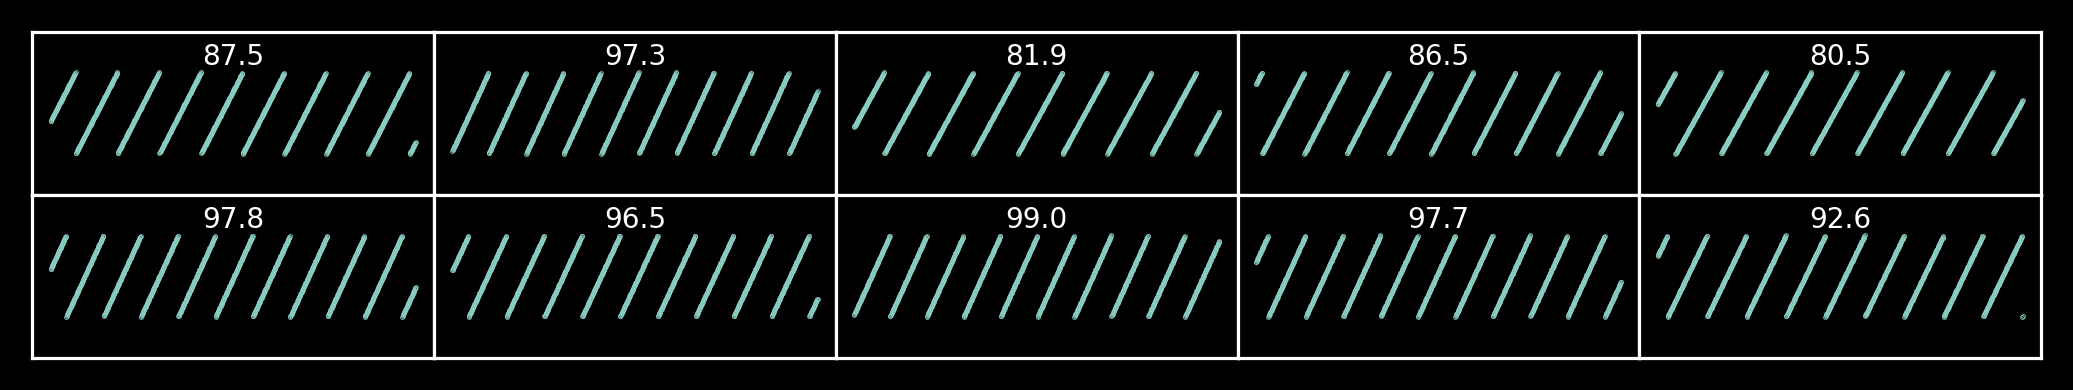

In [84]:
plot_rand_data('../../data/wrapped_2500_zero_noise_top_quintile_D.bz2', num = 10, dark = darkness, line = False)

### Zero noise, one notch down

 - 2500 entries per DataFrame
 - standard $\phi$ range
 - **$\tau$ ranges from 200ns to 0ns**
 
> Filenames: `wrapped_2500_zero_noise_full_notch_down_*.bz2`
 
> Networks:
> - ?

In [9]:
# # how many entries in the dataframe?
# num_entries = 2500

# # each entry has a slope computed before noise & spikes are applied
# tau_col = np.empty(num_entries)

# # generate data
# data = np.empty((num_entries, num_freqs))
# for i in range(num_entries):
    
#     # fix tau
#     tau = np.random.uniform(low = -200,
#                             high = 0) 
    
#     # fix phi
#     phi = np.random.uniform(high = 2 * np.pi)
    
#     # generate angle data from complex data
#     data[i]    = np.angle(np.exp(2*np.pi*1j * (tau*freqs + phi)))
    
#     # compute slope
#     tau_col[i] = get_slope(data[i])

# df = pd.DataFrame(data)
# df.insert(0, 'tau', tau_col)
# # df.to_csv('../../data/wrapped_2500_zero_noise_full_notch_down_A.bz2', index = False, compression = 'bz2')
# # df.to_csv('../../data/wrapped_2500_zero_noise_full_notch_down_B.bz2', index = False, compression = 'bz2')
# # df.to_csv('../../data/wrapped_2500_zero_noise_full_notch_down_C.bz2', index = False, compression = 'bz2')
# # df.to_csv('../../data/wrapped_2500_zero_noise_full_notch_down_D.bz2', index = False, compression = 'bz2')

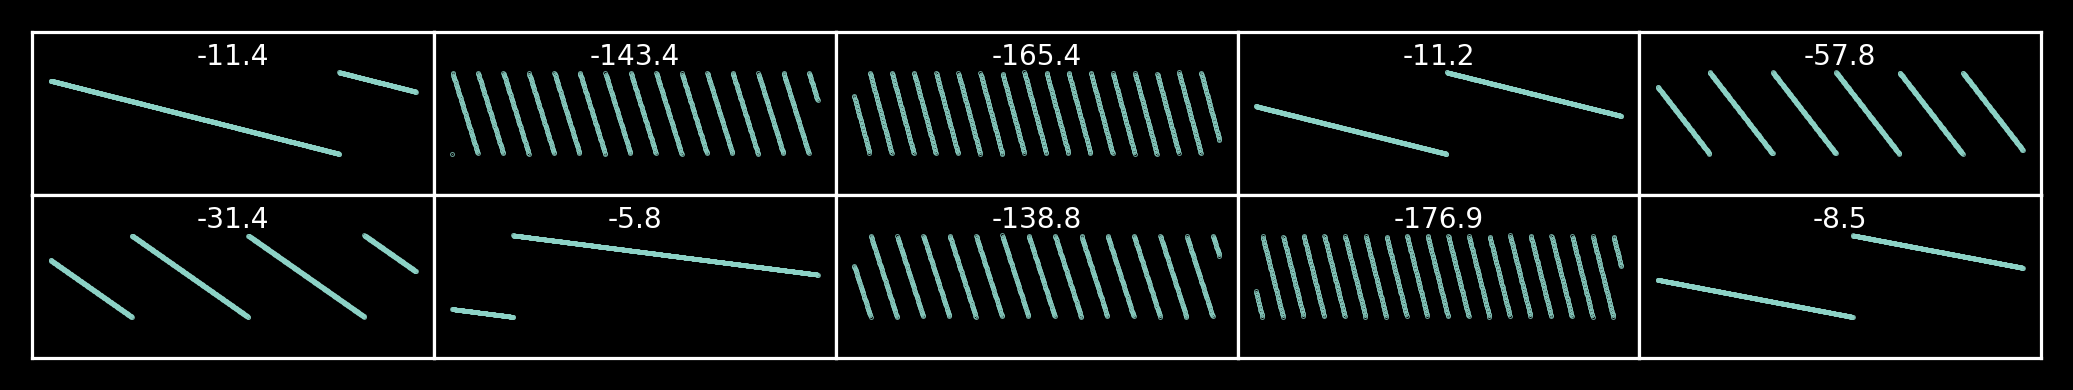

In [85]:
plot_rand_data('../../data/wrapped_2500_zero_noise_full_notch_down_D.bz2', num = 10, dark = darkness, line = False)

### Low Level Noise
 - 5000 entries per DataFrame
 - standard $\tau$ and $\phi$ range

> Noise:
 - **100%** of the data has noise applied of the form `np.random.normal()` with $\sigma = \pi$/100

> Filenames: `wrapped_5000_centi_gaussian_noise_*.bz2`

> Networks:
 - ?

In [21]:
# # how many entries in the dataframe?
# num_entries = 5000

# # each entry has a slope computed before noise & spikes are applied
# tau_col = np.empty(num_entries)

# # generate data
# data = np.empty((num_entries, num_freqs))
# for i in range(num_entries):
    
#     # fix tau
#     tau = np.random.uniform(low = min_tau,
#                             high = max_tau) 
    
#     # fix phi
#     phi = np.random.uniform(high = 2 * np.pi)
    
#     # generate angle data from complex data
#     data[i]    = np.angle(np.exp(2*np.pi*1j * (tau*freqs + phi)))
    
#     # compute slope
#     tau_col[i] = get_slope(data[i])
    
#     noise = np.random.normal(scale = np.pi / 100, size = len(freqs))

#     data[i] += noise
    
# df = pd.DataFrame(data)
# df.insert(0, 'tau', tau_col)
# # df.to_csv('../../data/wrapped_5000_centi_gaussian_noise_A.bz2', index = False, compression = 'bz2')
# # df.to_csv('../../data/wrapped_5000_centi_gaussian_noise_B.bz2', index = False, compression = 'bz2')
# # df.to_csv('../../data/wrapped_5000_centi_gaussian_noise_C.bz2', index = False, compression = 'bz2')
# # df.to_csv('../../data/wrapped_5000_centi_gaussian_noise_D.bz2', index = False, compression = 'bz2')


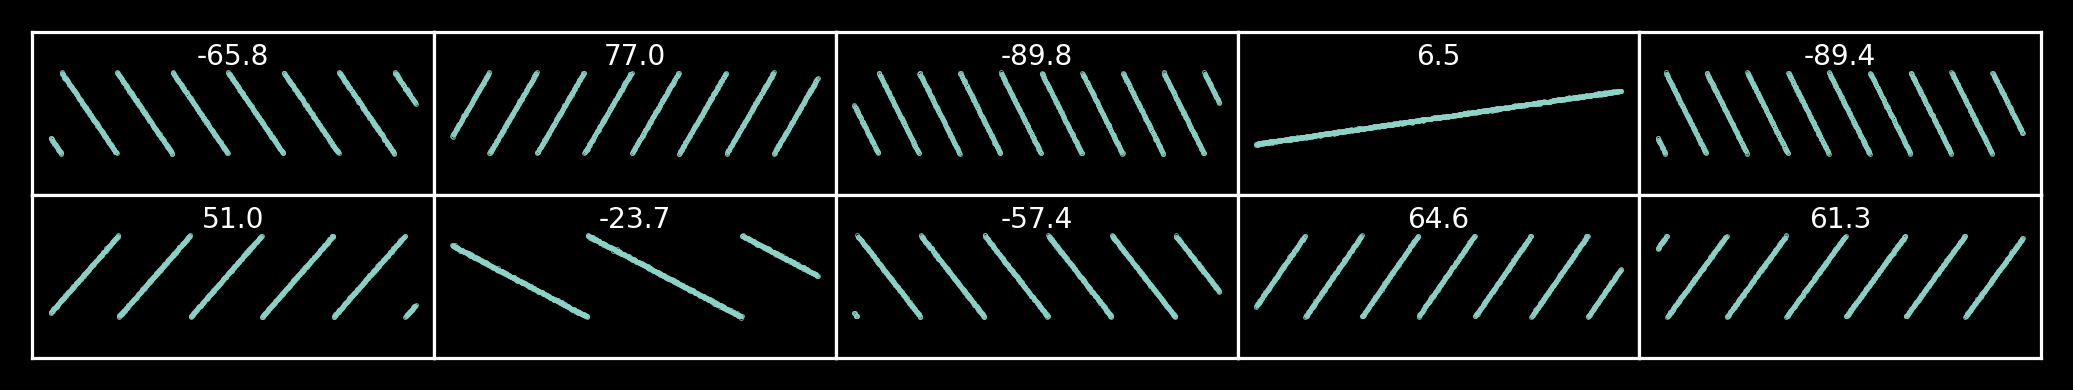

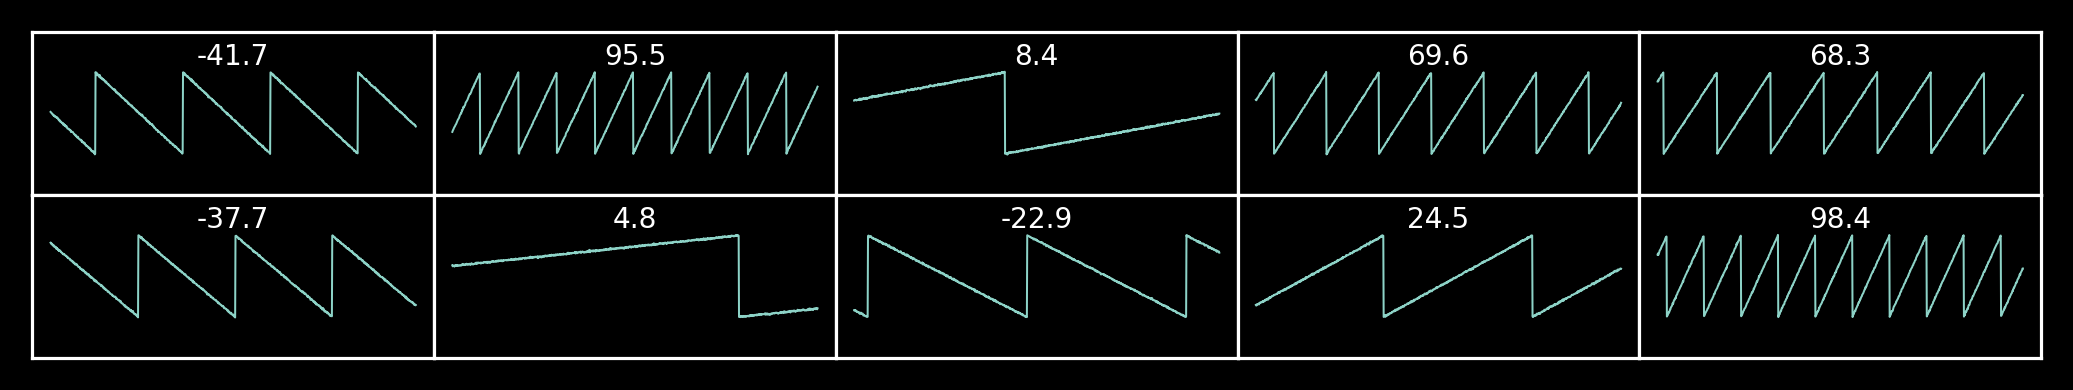

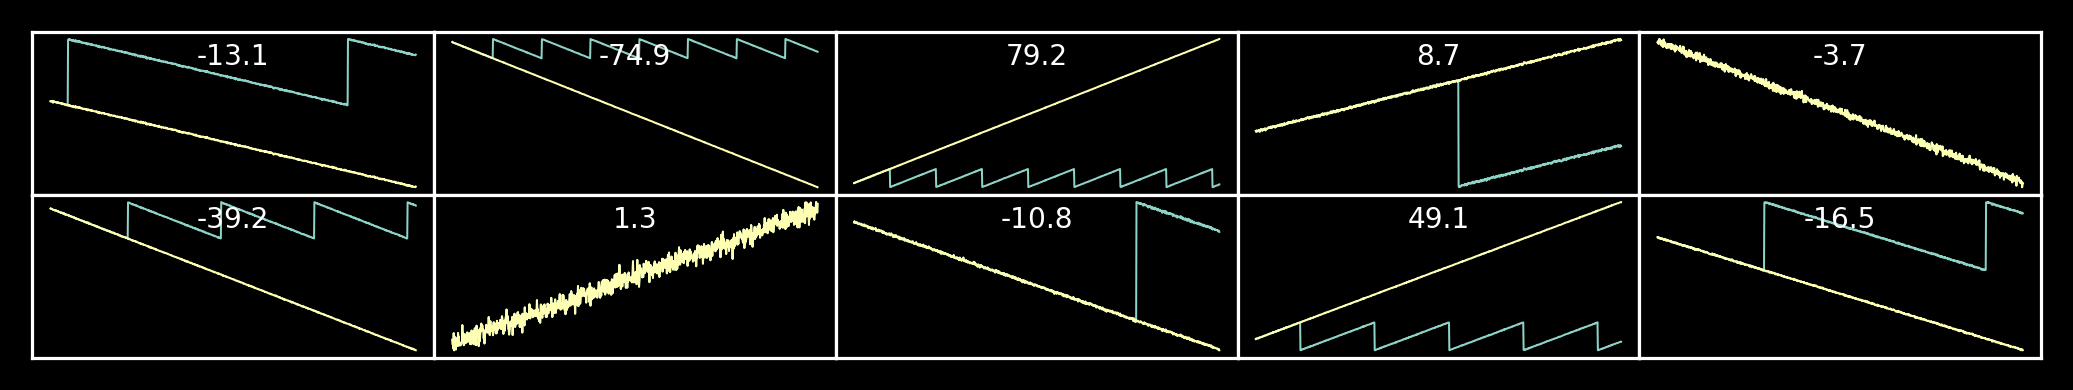

In [92]:
plot_rand_data('../../data/wrapped_5000_centi_gaussian_noise_D.bz2', num = 10, dark = darkness, line = False)
plot_rand_data('../../data/wrapped_5000_centi_gaussian_noise_D.bz2', num = 10, dark = darkness, line = True)
plot_rand_data('../../data/wrapped_5000_centi_gaussian_noise_D.bz2', num = 10, dark = darkness, line = True, unwrapped = True, small_range = False)

### Half low level noise, half moderate noise
 - 10000 entries per DataFrame
 - standard $\tau$ and $\phi$ range

> Noise:
 - **50%** of the data has noise applied of the form `np.random.normal()` with $\sigma = \pi/100$
 - **50%** of the data has noise applied of the form `np.random.normal()` with $\sigma = \pi/N$
  - where $N$ = `np.random.randint(1, high = 100)`
  
> Filenames: `wrapped_10000_moderate_gaussian_noise_*.bz2`

> Networks:
 - ?

In [69]:
# # how many entries in the dataframe?
# num_entries = 10000

# # each entry has a slope computed before noise & spikes are applied
# tau_col = np.empty(num_entries)

# # generate data
# data = np.empty((num_entries, num_freqs))
# for i in range(num_entries):
    
#     # fix tau
#     tau = np.random.uniform(low = min_tau,
#                             high = max_tau) 
    
#     # fix phi
#     phi = np.random.uniform(high = 2 * np.pi)
    
#     # generate angle data from complex data
#     data[i]    = np.angle(np.exp(2*np.pi*1j * (tau*freqs + phi)))
    
#     # compute slope
#     tau_col[i] = get_slope(data[i])
    
#     if np.random.uniform() > 0.5:
#         noise = np.random.normal(scale = np.pi / 100, size = len(freqs))
#     else:
#         noise = np.random.normal(scale = np.pi / np.random.randint(1, high = 100), size = len(freqs))
#     data[i] += noise
    
# df = pd.DataFrame(data)
# df.insert(0, 'tau', tau_col)
# # df.to_csv('../../data/wrapped_10000_moderate_gaussian_noise_A.bz2', index = False, compression = 'bz2')
# # df.to_csv('../../data/wrapped_10000_moderate_gaussian_noise_B.bz2', index = False, compression = 'bz2')
# # df.to_csv('../../data/wrapped_10000_moderate_gaussian_noise_C.bz2', index = False, compression = 'bz2')
# # df.to_csv('../../data/wrapped_10000_moderate_gaussian_noise_D.bz2', index = False, compression = 'bz2')



In [ ]:
plot_rand_data('../../data/wrapped_10000_moderate_gaussian_noise_D.bz2', num = 10, dark = darkness, line = False)
plot_rand_data('../../data/wrapped_10000_moderate_gaussian_noise_D.bz2', num = 10, dark = darkness, line = True)
plot_rand_data('../../data/wrapped_10000_moderate_gaussian_noise_D.bz2', num = 10, dark = darkness, line = True, unwrapped = True, small_range = False)